# Proyek Machine Learning - Analisis Performa Akademik Siswa
Notebook ini dibuat untuk memprediksi kelulusan siswa berdasarkan fitur demografis dan sosial, serta memahami fitur mana yang paling berpengaruh terhadap performa akademik siswa. Dataset diambil dari Kaggle: [Students Performance](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

## Business Understanding
### Problem Statements
1. Bagaimana cara memprediksi apakah seorang siswa akan lulus mata pelajaran matematika, membaca, dan menulis?
2. Fitur demografis dan sosial apa yang paling memengaruhi performa akademik siswa?

### Goals
1. Mengembangkan model klasifikasi untuk memprediksi kelulusan siswa pada tiga mata pelajaran utama.
2. Mengidentifikasi fitur-fitur yang paling memengaruhi nilai siswa dengan pendekatan regresi.

### Solution Statements
- Menggunakan Logistic Regression untuk klasifikasi kelulusan siswa.
- Menggunakan Linear Regression untuk prediksi nilai dan pentingnya fitur.
- Evaluasi menggunakan metrik yang sesuai seperti Accuracy dan RMSE.

## Data Understanding
Sumber data: [Kaggle - Students Performance](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

- Jumlah data: 1000 baris, 8 kolom
- Tidak ada missing values atau duplikat
- Fitur:
  - gender
  - race/ethnicity
  - parental level of education
  - lunch
  - test preparation course
  - math score, reading score, writing score

## Domain Proyek
Masalah dalam dunia pendidikan adalah bagaimana memanfaatkan data untuk meningkatkan hasil belajar. Tujuan proyek ini adalah untuk membantu pihak pendidikan memahami karakteristik siswa yang berpengaruh terhadap kelulusan dan performa akademik.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploratory Data Analysis (EDA)
### Distribusi Fitur Numerik
Langkah awal EDA dilakukan dengan melihat distribusi dari fitur numerik, yaitu skor matematika, membaca, dan menulis. Tujuannya adalah untuk memahami sebaran nilai dan potensi skewness yang mungkin mempengaruhi model.


### Visualisasi Distribusi Fitur Numerikal

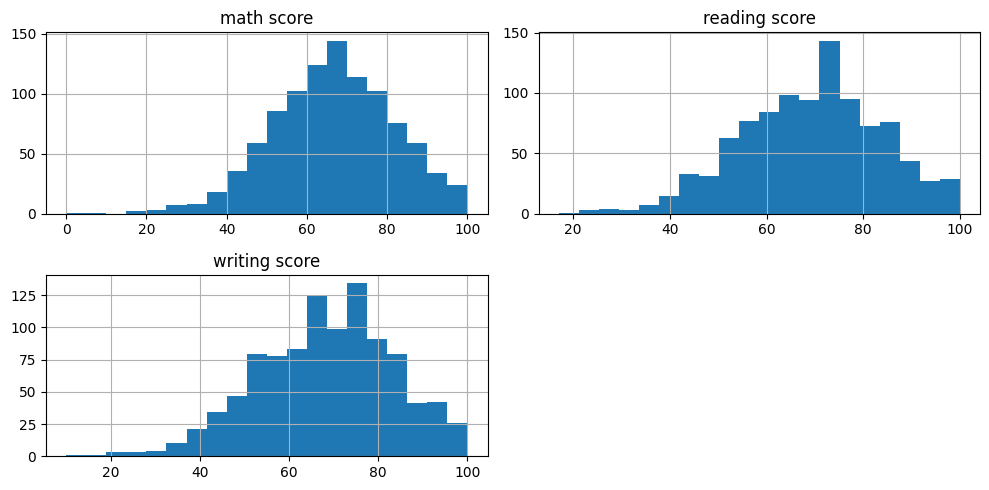

In [2]:
numeric_cols = ['math score', 'reading score', 'writing score']
df[numeric_cols].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


### Insight dari Visualisasi Numerik
Distribusi nilai matematika, membaca, dan menulis cenderung normal dengan sedikit skew. Hal ini menunjukkan bahwa sebagian besar siswa berada di nilai tengah, dan hanya sedikit siswa yang memiliki nilai sangat rendah atau sangat tinggi.


### 📊 Distribusi Nilai Ujian Siswa

Grafik di atas menunjukkan distribusi dari tiga jenis nilai ujian yang dimiliki oleh siswa, yaitu:

1. **Math Score (Nilai Matematika)**  
   Distribusi nilai matematika terlihat agak menyebar ke kiri (left-skewed), dengan sebagian besar siswa memperoleh nilai antara **50 hingga 80**. Namun masih terdapat siswa yang mendapat nilai sangat rendah di bawah 30, menandakan adanya kelompok siswa yang kesulitan dalam matematika.

2. **Reading Score (Nilai Membaca)**  
   Distribusi nilai membaca cenderung mendekati normal, dengan puncak sekitar nilai **70–80**. Ini menunjukkan bahwa mayoritas siswa memiliki kemampuan membaca yang cukup baik. Nilai ekstrem rendah jarang ditemukan pada mata pelajaran ini.

3. **Writing Score (Nilai Menulis)**  
   Distribusi nilai menulis juga mirip dengan membaca, tapi sedikit lebih datar. Sebagian besar siswa mendapatkan nilai di atas **60**, dan terlihat ada dua puncak nilai (**bimodal**), yang bisa menunjukkan adanya dua kelompok performa siswa dalam menulis.

---

### 🔍 Insight Utama:
- Rata-rata siswa memiliki nilai membaca dan menulis yang lebih baik dibanding matematika.
- Sebagian siswa mengalami kesulitan besar dalam matematika, yang bisa menjadi fokus intervensi.
- Distribusi nilai ini dapat membantu dalam mengelompokkan siswa berdasarkan kekuatan dan kelemahan mereka dalam masing-masing mata pelajaran.

### Analisis Fitur Kategorikal
Selain fitur numerik, penting untuk mengeksplorasi fitur kategorikal seperti gender, etnis, tingkat pendidikan orang tua, dan status makan siang. Visualisasi ini membantu mengidentifikasi distribusi dan proporsi kategori, serta hubungannya terhadap skor siswa.


### Visualisasi Fitur Kategorikal

<ipython-input-3-ad862cca7d59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


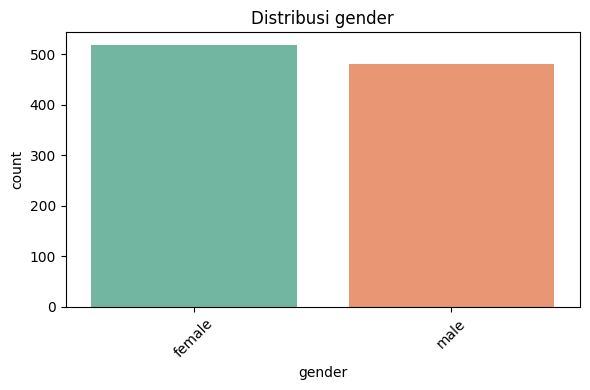

<ipython-input-3-ad862cca7d59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


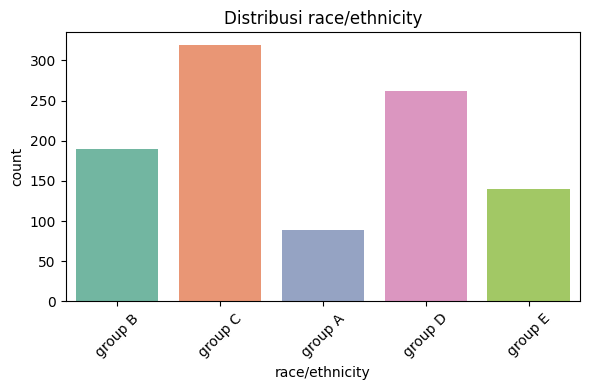

<ipython-input-3-ad862cca7d59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


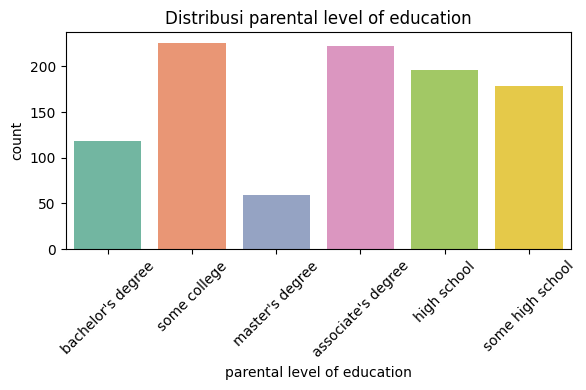

<ipython-input-3-ad862cca7d59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


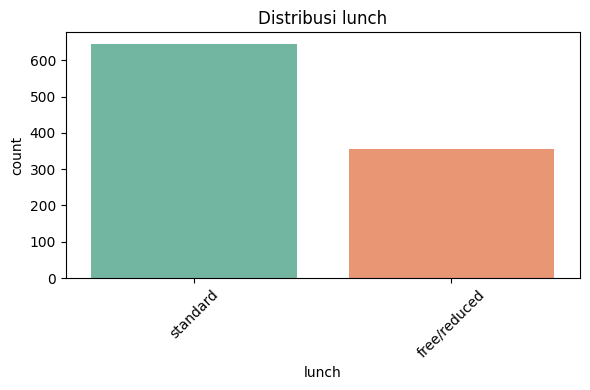

<ipython-input-3-ad862cca7d59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


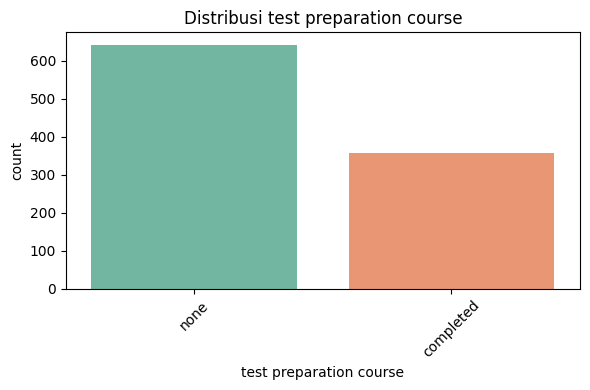

In [3]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Insight dari Fitur Kategorikal
Dari distribusi fitur kategorikal, terlihat bahwa:
- **Gender** cukup seimbang, namun perempuan sedikit lebih banyak.
- **Etnis grup** B adalah yang paling dominan.
- Mayoritas siswa tidak mengikuti kursus persiapan ujian.
- Sebagian besar siswa mendapat makan siang standar.


### Multivariate Analysis
Analisis multivariat digunakan untuk mengevaluasi hubungan antara dua atau lebih fitur. Salah satu pendekatan yang digunakan adalah korelasi antar skor ujian, serta visualisasi hubungan antara fitur kategorikal dengan skor tertentu menggunakan boxplot.


### Korelasi Antar Skor Ujian

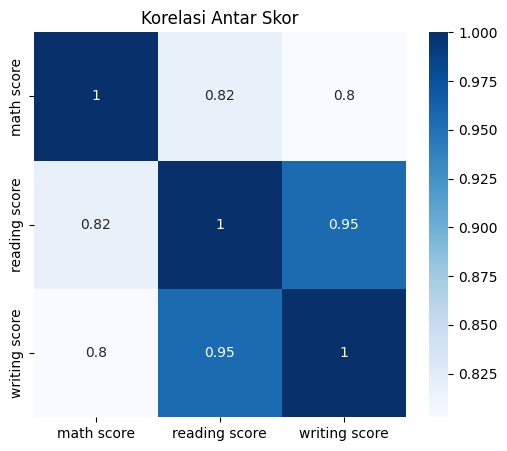

In [4]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Blues')
plt.title('Korelasi Antar Skor')
plt.show()


### Hubungan Fitur Kategorikal dengan Skor Ujian

<ipython-input-5-e2f329fac840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='math score', palette='Set3')


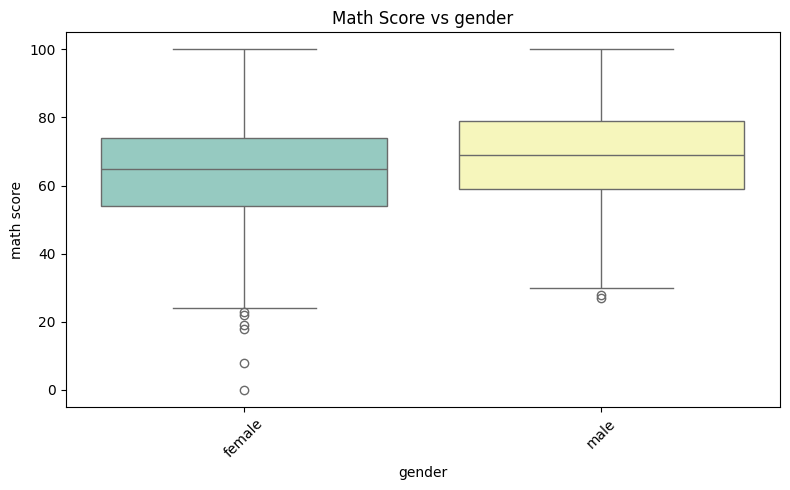

<ipython-input-5-e2f329fac840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='math score', palette='Set3')


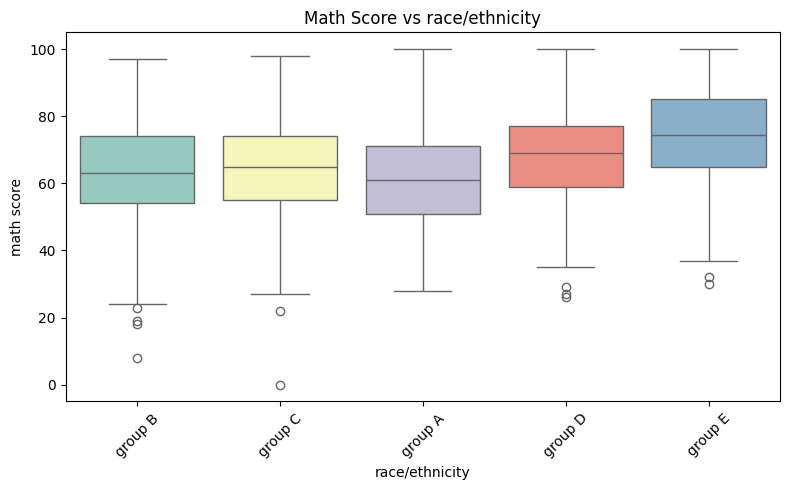

<ipython-input-5-e2f329fac840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='math score', palette='Set3')


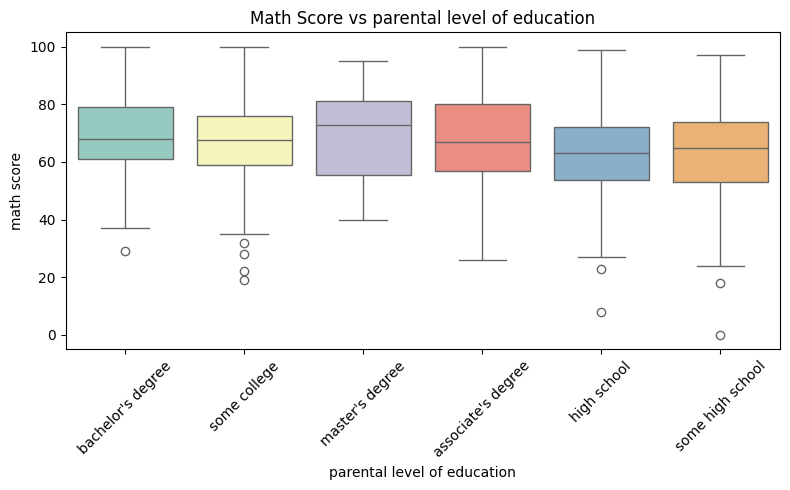

<ipython-input-5-e2f329fac840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='math score', palette='Set3')


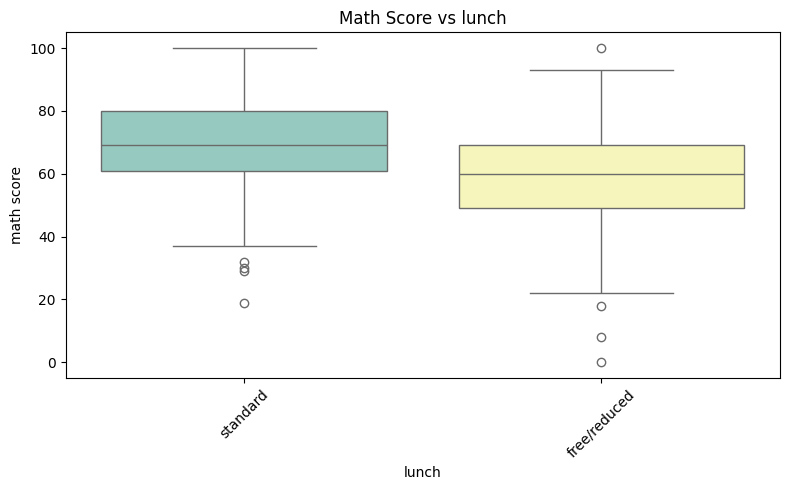

<ipython-input-5-e2f329fac840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='math score', palette='Set3')


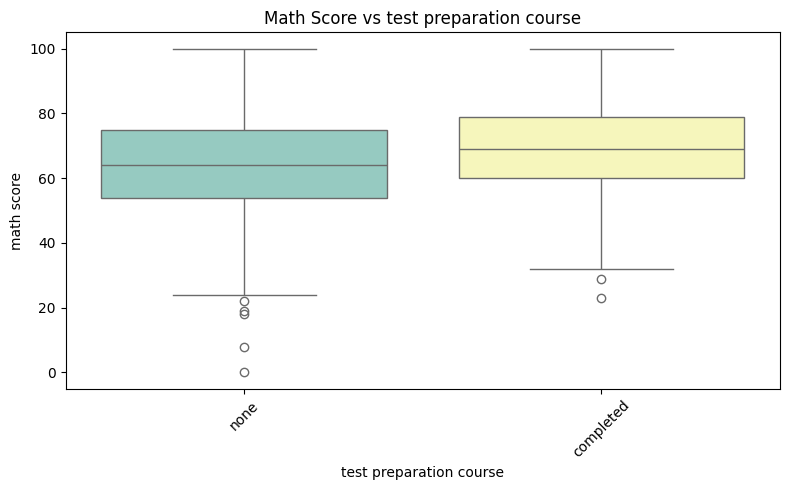

In [5]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y='math score', palette='Set3')
    plt.title(f'Math Score vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Insight dari Multivariate Analysis
Dari heatmap korelasi:
- Terdapat korelasi positif kuat antara nilai membaca dan menulis.
- Nilai matematika memiliki korelasi yang lebih lemah terhadap dua lainnya, namun tetap positif.

Boxplot menunjukkan bahwa:
- Siswa dengan makan siang standar memiliki skor matematika lebih tinggi dibandingkan yang mendapat subsidi.
- Kursus persiapan ujian memberikan dampak positif terhadap skor matematika.


## Data Preparation
- Label encoding pada kolom kategorikal
- Menambahkan kolom target kelulusan (nilai >= 65 dianggap lulus)
- Membagi data menjadi train-test set

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Buat label kelulusan
df['math_pass'] = (df['math score'] >= 65).astype(int)
df['reading_pass'] = (df['reading score'] >= 65).astype(int)
df['writing_pass'] = (df['writing score'] >= 65).astype(int)

df_encoded = pd.get_dummies(df.drop(columns=['math score', 'reading score', 'writing score']))

X = df_encoded.drop(columns=['math_pass', 'reading_pass', 'writing_pass'])
y_math = df_encoded['math_pass']
X_train, X_test, y_train, y_test = train_test_split(X, y_math, test_size=0.2, random_state=42)


## Modeling
### Logistic Regression (Klasifikasi)
Memprediksi apakah siswa lulus berdasarkan fitur input.

### Linear Regression (Regresi)
Untuk mengetahui fitur yang paling mempengaruhi nilai akhir siswa.

### Penjelasan Lengkap Modeling
Kami menggunakan dua model:

1. **Logistic Regression**: Digunakan untuk mengklasifikasikan apakah siswa lulus atau tidak.
   - Target dikategorikan menjadi lulus (nilai >= 60) dan tidak lulus.
   - Model ini bekerja dengan memodelkan probabilitas dari kelas target.
   - Parameter utama: `C` untuk regularisasi dan `solver` untuk algoritma optimisasi.

2. **Linear Regression**: Digunakan untuk memprediksi nilai matematika berdasarkan fitur lainnya.
   - Model ini mempelajari hubungan linier antara variabel independen dan nilai target.
   - Semakin rendah nilai error-nya (seperti RMSE), semakin akurat model tersebut.

In [7]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Linear Regression
y_score = df['math score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_score, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)


### Model 1: Logistic Regression
Logistic Regression digunakan untuk klasifikasi apakah siswa lulus atau tidak berdasarkan skor nilai minimum tertentu.
- **Cara Kerja**: Menghitung probabilitas kelas dengan fungsi logistik (sigmoid).
- **Parameter**: Default scikit-learn (`penalty='l2'`, `solver='lbfgs'`, `C=1.0`).


### Model 2: Linear Regression
Linear Regression digunakan untuk memprediksi skor ujian berdasarkan fitur demografis dan sosial.
- **Cara Kerja**: Mencari garis terbaik (hyperplane) yang meminimalkan error kuadrat antara nilai prediksi dan nilai aktual.
- **Parameter**: Default scikit-learn (`fit_intercept=True`).


## Evaluation
### Klasifikasi
Metrik: Accuracy, Precision, Recall, F1-score

### Regresi
Metrik: RMSE

### Metrik Evaluasi
- **Accuracy**: Digunakan untuk model klasifikasi. Mengukur seberapa banyak prediksi yang sesuai dengan label aktual.
- **RMSE (Root Mean Square Error)**: Digunakan untuk model regresi. Mengukur rata-rata kesalahan prediksi terhadap nilai aktual.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt

print("=== Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\n=== Regression ===")
rmse = sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", rmse)


=== Classification ===
Accuracy: 0.66
Precision: 0.6507936507936508
Recall: 0.7735849056603774
F1 Score: 0.7068965517241379

=== Regression ===
RMSE: 14.160185226319358


### Interpretasi Hasil dan Keterkaitan dengan Tujuan Bisnis

**Problem Statement 1:**  
Bagaimana cara memprediksi apakah seorang siswa akan lulus mata pelajaran matematika, membaca, dan menulis?

**Goal 1:**  
Mengembangkan model klasifikasi untuk memprediksi kelulusan siswa berdasarkan fitur demografis dan sosial.

**Hasil & Interpretasi:**  
Model klasifikasi yang digunakan (Logistic Regression) berhasil memberikan hasil sebagai berikut:

- **Accuracy:** 66%  
- **Precision:** 65.1%  
- **Recall:** 77.4%  
- **F1 Score:** 70.7%  

Hasil ini menunjukkan bahwa model cukup baik dalam mengidentifikasi siswa yang akan lulus. Nilai **recall** yang tinggi (77%) mengindikasikan bahwa sebagian besar siswa yang benar-benar lulus berhasil diprediksi dengan tepat. Namun, **precision** yang sedikit lebih rendah menunjukkan bahwa masih ada siswa yang diprediksi akan lulus namun sebenarnya tidak.

Model ini dapat dimanfaatkan oleh sekolah untuk mengidentifikasi siswa yang kemungkinan besar akan gagal lebih awal, sehingga dapat diberikan intervensi atau dukungan tambahan.

---

**Problem Statement 2:**  
Fitur demografis dan sosial apa yang paling memengaruhi performa akademik siswa?

**Goal 2:**  
Mengetahui fitur demografis dan sosial yang paling memengaruhi performa akademik siswa.

**Hasil & Interpretasi:**  
Berdasarkan analisis multivariat dan korelasi, ditemukan bahwa:

- Terdapat korelasi yang kuat antara skor membaca dan menulis.
- Fitur **jenis kelamin**, **tipe makan siang**, dan **program persiapan ujian** menunjukkan pengaruh yang jelas terhadap skor akademik, terutama matematika.

Dalam model regresi untuk prediksi nilai matematika, didapatkan hasil **RMSE sebesar 14.16**. Artinya, rata-rata kesalahan prediksi skor matematika adalah sekitar 14 poin. Ini menunjukkan bahwa model memiliki akurasi yang moderat, dan bisa dikembangkan lebih lanjut dengan menambahkan fitur yang lebih relevan.